In [24]:
def calculate_parameters(widths, kernel_size, dim=3):
    total_params = 0
    input_channels = 1
    for width in widths:
        total_params += (input_channels * kernel_size**dim * width) + width  # parameters in the first conv layer
        total_params += (width * kernel_size**dim * width) + width  # parameters in the second conv layer
        input_channels = width
    total_params += (input_channels * 1**dim * 1) + 1  # parameters in the output conv layer
    return total_params

widths = [4, 8, 16, 32, 64]
kernel_size = 3
total_params = calculate_parameters(widths, kernel_size)
print(f'Total learnable parameters: {total_params}')
total_params = calculate_parameters(widths, kernel_size, dim=2)
print(f'Total learnable parameters: {total_params}')

Total learnable parameters: 221173
Total learnable parameters: 73933


In [25]:
import torch
from operator import itemgetter

In [26]:
datapath = "../model3Delastic/data/data_files/data_elasticity_3D_res128.pt"

In [27]:
highresdata = torch.load(datapath)

In [28]:
highresdata.keys()

dict_keys(['young_modulus', 'stress'])

In [29]:
highresdata['young_modulus']

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1

In [30]:
input, output = itemgetter('young_modulus', 'stress')(highresdata)

In [31]:
input.shape

torch.Size([128, 128, 128, 128])

In [32]:
output.shape

torch.Size([128, 128, 128, 128])

In [14]:
input.unsqueeze(1).shape

torch.Size([128, 1, 128, 128, 128])

In [70]:
import mlflow 
import os

In [71]:
path_of_runs= "mlruns/558424536518409256/"
list_of_runs = [x for x in os.listdir(path_of_runs) if len(x)>20]
list_of_runs

['06d2c7fcafbe4d35aab6c32581afcd12',
 'b1b419d738eb4ebe9ed6747d8d0bd8b5',
 'bd25888e7b64420d81d85dc2ac7066df',
 'bffd40345e9d45738295af1e1a99d4e8',
 '94424dd1f84d4922b09cab9683a2afb6',
 'c28b673c027841ffb87b477151814ddb',
 '3d9ed8be5c3e4660a0fe67dd853885c6',
 '5a70525c21f149ec8b169cad420af750',
 'defd1a8393f044c3b9b01633bc6aefd0',
 'b580c6922f1c421aaa88806327c088c6',
 '0076765d02e642398a581fe86f279308',
 '11941d7d0d314247941cd046e97c5285',
 'a8921255ee7b4e21a2ad86a9ef9a05f1',
 '0ddcc226af6842ba97de03dd1e815bd6',
 '7231a90ab37945b99711ce3ad662ac14',
 'a22736268d544f86a9e39e2aebaceb50',
 'adcfb9fab80b49728beee0b32c80520b',
 'c897f7c6338d46bd9702031bbea7f17a',
 '70b77fe1e31c40b59bf5c311c91f9f82',
 'e30fb2bcb5744134ab189e22fa47a268',
 'f991b12b3eb54caa8487ff9d1251390f',
 '27a7225b0fc74818b53f413c460a93d2',
 '2da834d73af64c83a3d2bcf6743467b3',
 '0274c1759b0742378cbb0e854fbfea89',
 'dcd56e8d5ade41e080008d6c14d0d139',
 '7164df57834143c583c46a9e42d03e51',
 '68ebdd6937bd4b8da7e876a1c00961cb',
 

In [17]:
for run_path in list_of_runs:
    with mlflow.start_run(run_id=run_path) as run:
        try:
            batch = mlflow.active_run().data._params['batch_size']
            last_epoch = mlflow.active_run().data._params['last_epoch']
            mlflow.log_param("number_of_updates", int(0.75*512/int(batch))*int(last_epoch))
            training_time = mlflow.active_run().data._metrics['training_time']
            mlflow.log_param("time_per_update", float(training_time)/(int(0.75*512/int(batch))*int(last_epoch)))
        except:
            pass
        
        

In [75]:
for run_path in list_of_runs:
    with mlflow.start_run(run_id=run_path) as run:
        try:
            batch = (0.9 - mlflow.active_run().data._metrics['testing MAE'])
            last_epoch = mlflow.active_run().data._metrics['training_time']
            mlflow.log_metric("trade-off3", batch/last_epoch)
        except:
            pass
    

In [7]:
from dataset import Dataset
import torch
import matplotlib.pyplot as plt
import matplotlib

In [8]:
DATAPATH = '../model3Delastic/data/data_files/' 
n_samples = 128
dataset = Dataset(DATAPATH,
                  n_samples=n_samples)

dataset.load_data()

Device:  cpu
Deletion of input/output
../model3Delastic/data/data_files/data_elasticity_3D_128_0_L0_S0_input.pt
../model3Delastic/data/data_files/data_elasticity_3D_128_0_L0_S0_output.pt
After 0 augmentation the input & output size is torch.Size([128, 1, 64, 64, 64])


In [24]:
def volume(x, y, z, data, data_type: str, epoch, **kwargs):
    x = x.cpu()
    y = y.cpu()
    z = z.cpu()
    data = data.cpu()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dz = z[1] - z[0]

    x = x - dx / 2
    x = x.add(x[-1] + dx)
    y = y - dy / 2
    y = y.add(y[-1] + dy)
    z = z - dz / 2
    z = z.add(z[-1] + dz)

    X, Y, Z = torch.meshgrid(x, y, z, indexing='ij')

    colormap = kwargs.get('cmap', 'jet')
    data_min = kwargs.get('vmin', data.min())
    data_max = kwargs.get('vmax', data.max())

    norm = matplotlib.colors.Normalize(vmin=data_min, vmax=data_max)
    data = norm(data)

    args = {'linewidth': 0, 'antialiased': False, 'rstride': 1, 'cstride': 1, 'shade': False}
    cmap = plt.get_cmap(colormap, 1024)

    my_col = cmap.__call__(data[:, :, -1])
    ax.plot_surface(X[:, :, -1], Y[:, :, -1], Z[:, :, -1], facecolors=my_col, **args)

    my_col = cmap.__call__(data[:, 0, :])
    ax.plot_surface(X[:, 0, :], Y[:, 0, :], Z[:, 0, :], facecolors=my_col, **args)

    my_col = cmap.__call__(data[0, :, :])
    ax.plot_surface(X[0, :, :], Y[0, :, :], Z[0, :, :], facecolors=my_col, **args)

    # my_col = cmap.__call__(data[:, :, 0])
    # ax.plot_surface(X[:, :, 0], Y[:, :, 0], Z[:, :, 0], facecolors=my_col, **args)

    # my_col = cmap.__call__(data[:, -1, :])
    # ax.plot_surface(X[:, -1, :], Y[:, -1, :], Z[:, -1, :], facecolors=my_col, **args)

    # my_col = cmap.__call__(data[-1, :, :])
    # test = ax.plot_surface(X[-1, :, :], Y[-1, :, :], Z[-1, :, :], facecolors=my_col, **args)

    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    zmin, zmax = z.min(), z.max()

    # edges_kw = dict(color='k', linewidth=1, zorder=1e3)
    # ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
    # # ax.plot([xmin, xmax], [ymax, ymax], zmin, **edges_kw)
    # ax.plot([xmin, xmax], [ymin, ymin], zmax, **edges_kw)
    # ax.plot([xmin, xmax], [ymax, ymax], zmax, **edges_kw)

    # ax.plot([xmin, xmin], [ymin, ymax], zmin, **edges_kw)
    # # ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
    # ax.plot([xmin, xmin], [ymin, ymax], zmax, **edges_kw)
    # ax.plot([xmax, xmax], [ymin, ymax], zmax, **edges_kw)

    # ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
    # ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
    # ax.plot([xmin, xmin], [ymax, ymax], [zmin, zmax], **edges_kw)
    # # ax.plot([xmax, xmax], [ymax, ymax], [zmin, zmax], **edges_kw)

    ax.set(xlabel='X', ylabel='Y', zlabel='Z')

    ax.view_init(15, -105, 0)

    ax.set(xlim=[x.min(), x.max()], ylim=[y.min(), y.max()], zlim=[z.min(), z.max()])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    fig.colorbar(sm, ax=ax)

    ax.set_proj_type('ortho')
    ax.set_aspect('equal')
    
    fig.tight_layout()
        
    plt.show()

## Visualization Rotation

In [25]:
input, output = dataset.input[0, 0, ...], dataset.output[0, 0, ...]

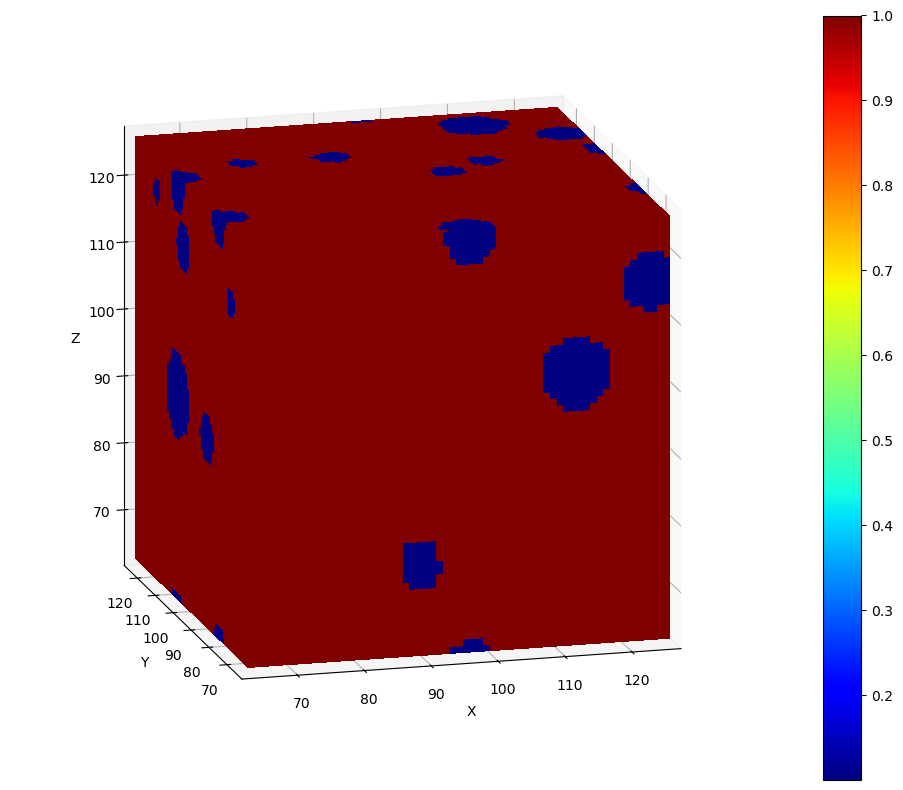

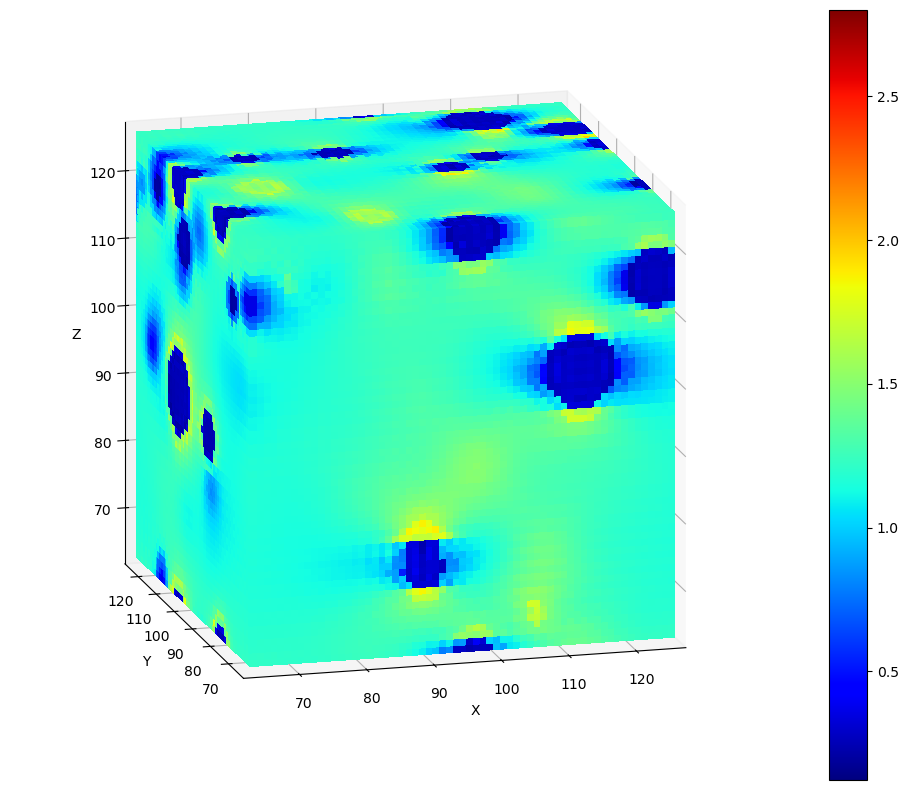

In [26]:
x, y, z = torch.arange(64), torch.arange(64), torch.arange(64) # create grid
volume(x ,y ,z , input, data_type='input', epoch=0, vim=0, vmax=1)
volume(x ,y ,z , output, data_type='output', epoch=0, vim=0, vmax=torch.max(output))

In [30]:
from augmentation import augment2

In [31]:
input_rot, output_rot = augment2(input.unsqueeze(0).unsqueeze(0), output.unsqueeze(0).unsqueeze(0))
input_rot, output_rot = input_rot.squeeze(0).squeeze(0), output_rot.squeeze(0).squeeze(0)

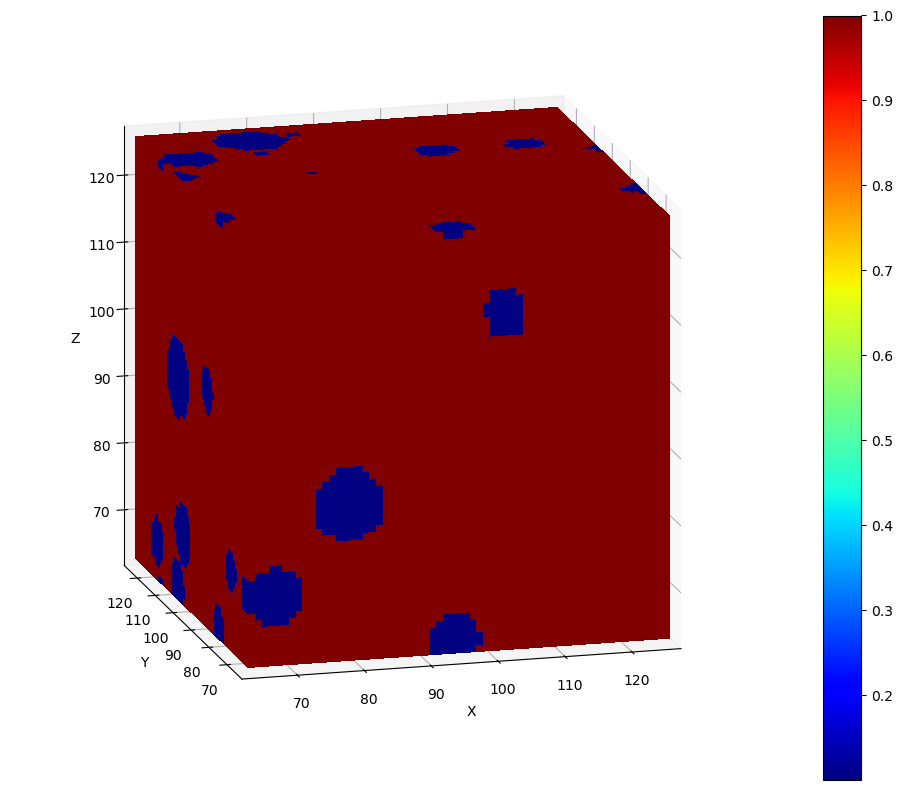

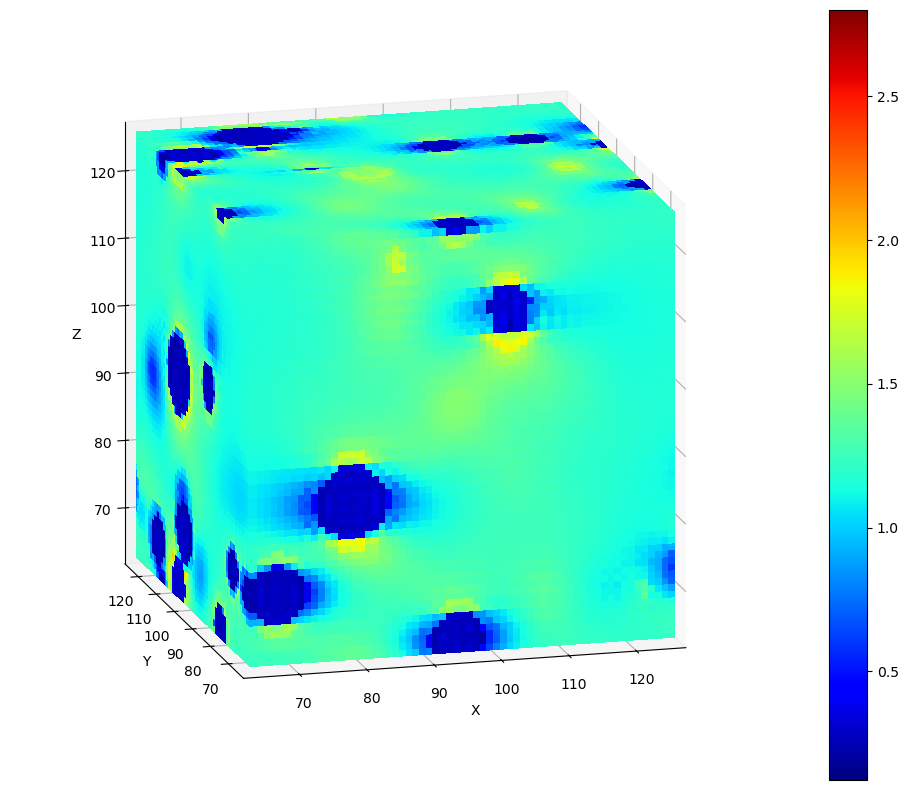

In [32]:
x, y, z = torch.arange(64), torch.arange(64), torch.arange(64) # create grid
volume(x ,y ,z , input_rot, data_type='input', epoch=0, vim=0, vmax=1)
volume(x ,y ,z , output_rot, data_type='output', epoch=0, vim=0, vmax=torch.max(output_rot))

In [7]:
from os import path
import torch
import matplotlib
import matplotlib.pyplot as plt
from operator import itemgetter

In [8]:
DATAPATH = '../model3Delastic/data/data_files/' 


In [9]:
n_sample = 128
print(f"\n\n——————————————————————\nFor number of samples: {n_sample}\n——————————————————————\n")

key_dataset = DATAPATH + "data_elasticity_3D_res64.pt"
if path.exists(key_dataset):
    input, output = itemgetter('young_modulus', 'stress')(torch.load(key_dataset, map_location=torch.device('cpu')))



——————————————————————
For number of samples: 128
——————————————————————



In [62]:
def volume(x, y, z, data, data_type: str, epoch, **kwargs):
    x = x.cpu()
    y = y.cpu()
    z = z.cpu()
    data = data.cpu()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dz = z[1] - z[0]

    x = x - dx / 2
    x = x.add(x[-1] + dx)
    y = y - dy / 2
    y = y.add(y[-1] + dy)
    z = z - dz / 2
    z = z.add(z[-1] + dz)

    X, Y, Z = torch.meshgrid(x, y, z, indexing='ij')

    colormap = kwargs.get('cmap', 'jet')
    data_min = kwargs.get('vmin', data.min())
    data_max = kwargs.get('vmax', data.max())

    norm = matplotlib.colors.Normalize(vmin=data_min, vmax=data_max)
    data = norm(data)

    args = {'linewidth': 0, 'antialiased': False, 'rstride': 1, 'cstride': 1, 'shade': False}
    cmap = plt.get_cmap(colormap, 1024)

    my_col = cmap.__call__(data[:, :, -1])
    ax.plot_surface(X[:, :, -1], Y[:, :, -1], Z[:, :, -1], facecolors=my_col, **args)

    my_col = cmap.__call__(data[:, 0, :])
    ax.plot_surface(X[:, 0, :], Y[:, 0, :], Z[:, 0, :], facecolors=my_col, **args)

    my_col = cmap.__call__(data[0, :, :])
    ax.plot_surface(X[0, :, :], Y[0, :, :], Z[0, :, :], facecolors=my_col, **args)

    # my_col = cmap.__call__(data[:, :, 0])
    # ax.plot_surface(X[:, :, 0], Y[:, :, 0], Z[:, :, 0], facecolors=my_col, **args)

    # my_col = cmap.__call__(data[:, -1, :])
    # ax.plot_surface(X[:, -1, :], Y[:, -1, :], Z[:, -1, :], facecolors=my_col, **args)

    # my_col = cmap.__call__(data[-1, :, :])
    # test = ax.plot_surface(X[-1, :, :], Y[-1, :, :], Z[-1, :, :], facecolors=my_col, **args)

    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    zmin, zmax = z.min(), z.max()

    # edges_kw = dict(color='k', linewidth=1, zorder=1e3)
    # ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
    # # ax.plot([xmin, xmax], [ymax, ymax], zmin, **edges_kw)
    # ax.plot([xmin, xmax], [ymin, ymin], zmax, **edges_kw)
    # ax.plot([xmin, xmax], [ymax, ymax], zmax, **edges_kw)

    # ax.plot([xmin, xmin], [ymin, ymax], zmin, **edges_kw)
    # # ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
    # ax.plot([xmin, xmin], [ymin, ymax], zmax, **edges_kw)
    # ax.plot([xmax, xmax], [ymin, ymax], zmax, **edges_kw)

    # ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
    # ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
    # ax.plot([xmin, xmin], [ymax, ymax], [zmin, zmax], **edges_kw)
    # # ax.plot([xmax, xmax], [ymax, ymax], [zmin, zmax], **edges_kw)

    ax.set(xlabel='X', ylabel='Y', zlabel='Z')

    ax.view_init(15, -105, 0)

    ax.set(xlim=[x.min(), x.max()], ylim=[y.min(), y.max()], zlim=[z.min(), z.max()])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    fig.colorbar(sm, ax=ax)

    ax.set_proj_type('ortho')
    ax.set_aspect('equal')
    
    fig.tight_layout()
        
    plt.show()

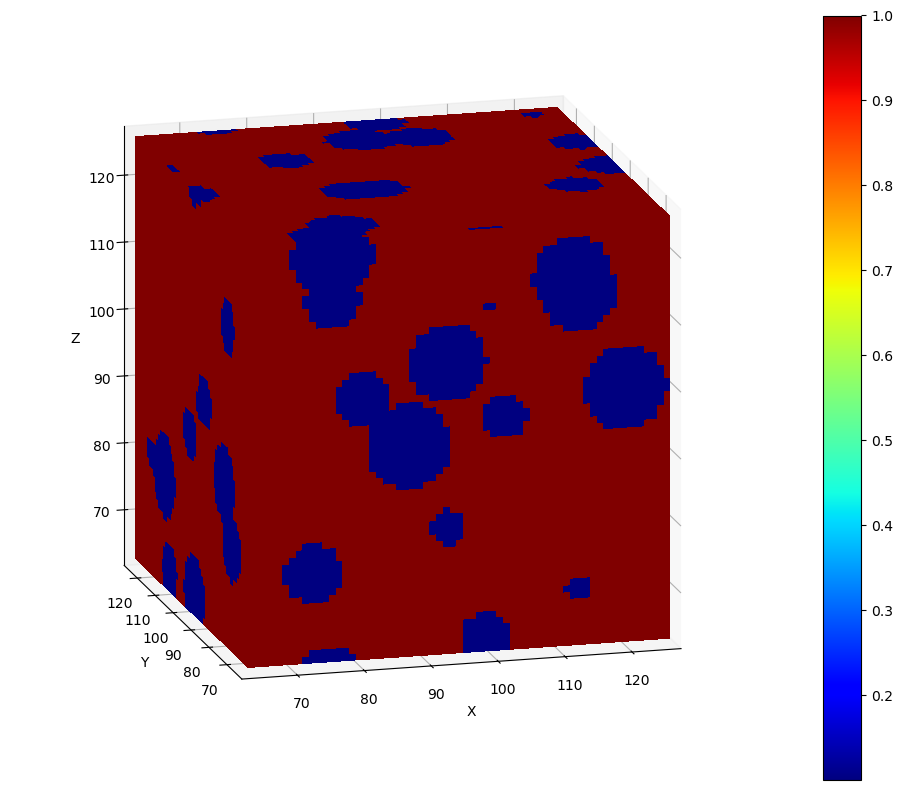

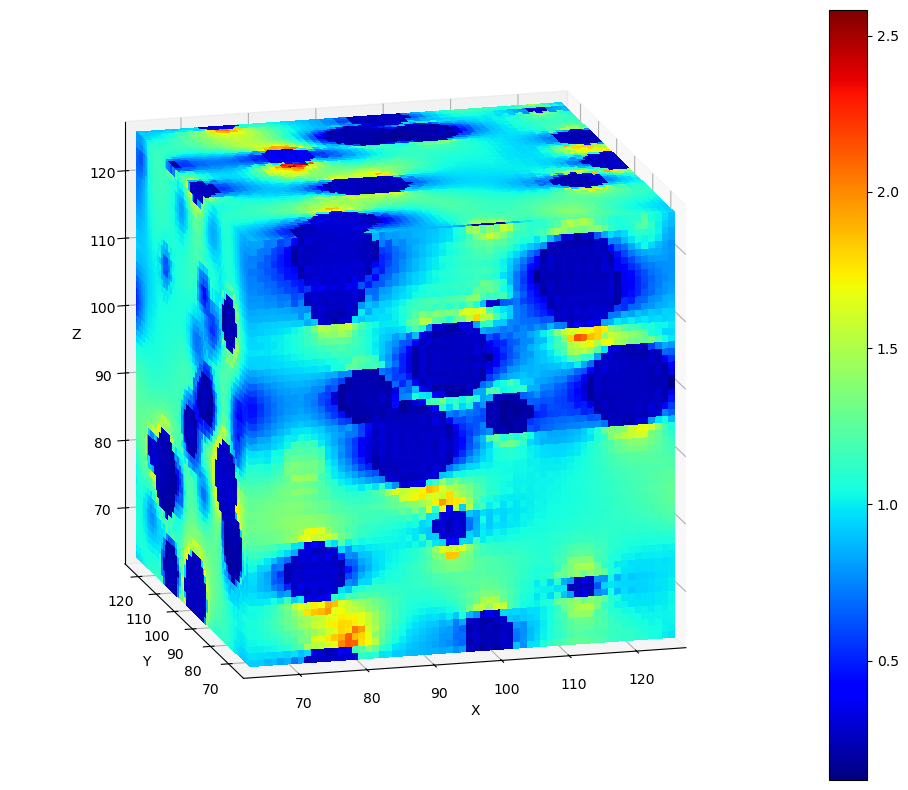

In [63]:
x, y, z = torch.arange(64), torch.arange(64), torch.arange(64) # create grid
volume(x ,y ,z , input[0], data_type='input', epoch=0, vim=0, vmax=1)
max_output = torch.max(output[0])
volume(x ,y ,z , output[0], data_type='output', epoch=0, vim=0, vmax=max_output)

# Lowres

In [10]:
import mlflow
import torch

In [11]:
# path_of_runs = "mlruns/327285200438910118/"
path_of_runs = "mlruns/929917654968280603/"

In [18]:
# with mlflow.start_run(run_id="f6a6fb430e0d46dd90e86fe925418900") as run:
with mlflow.start_run(run_id="a989ec5a26ee47af946a8736104fbd9d") as run:
# with mlflow.start_run(run_id="8e0bdab409d64de5bbd7ed74389fa9a8") as run:
    # Inference after loading the logged model
    # model_uri = path_of_runs + run.info.run_id + "/artifacts/model@ep146"
    model_uri = path_of_runs + run.info.run_id + "/artifacts/model@ep500"
    # model_uri = path_of_runs + run.info.run_id + "/artifacts/model@ep720"
    loaded_model = mlflow.pytorch.load_model(model_uri, map_location=torch.device('cpu'))
    # print(output.shape)
    # volume(x ,y ,z , output[0, 0, ...], data_type='output', epoch=0, vim=0, vmax=max_output)
    

2024/06/21 14:16:37 WARNING mlflow.pytorch: Stored model version '2.3.0+cu121' does not match installed PyTorch version '2.2.2'


In [23]:
import time

In [24]:
times = []
for loop in range(128):
    X = input[loop].unsqueeze(0).unsqueeze(0)
    start = time.time()
    output = loaded_model(X).detach()
    times.append(time.time() - start)
print(sum(times)/len(times))

0.306587602943182


In [44]:
print(times2)

[0.6633930206298828, 0.5156068801879883, 0.3183469772338867, 0.2876701354980469, 0.30370211601257324, 0.2787792682647705, 0.27507686614990234, 0.2825319766998291, 0.2728090286254883, 0.27662014961242676, 0.2727029323577881, 0.27594590187072754, 0.2752833366394043, 0.2712569236755371, 0.2696497440338135, 0.27762603759765625, 0.27740478515625, 0.2723090648651123, 0.2790660858154297, 0.27924323081970215, 0.270125150680542, 0.27430295944213867, 0.27708005905151367, 0.27484798431396484, 0.2698550224304199, 0.2702467441558838, 0.27312588691711426, 0.2697792053222656, 0.27310991287231445, 0.2741870880126953, 0.26676511764526367, 0.275378942489624, 0.2805302143096924, 0.27867913246154785, 0.27519893646240234, 0.2685270309448242, 0.2777900695800781, 0.26996588706970215, 0.26859283447265625, 0.27805519104003906, 0.2729978561401367, 0.27104711532592773, 0.2771170139312744, 0.27254605293273926, 0.270355224609375, 0.2835509777069092, 0.3760709762573242, 0.272676944732666, 0.27121400833129883, 0.273

In [56]:
print(times)

[0.2728090286254883, 0.27662014961242676, 0.2727029323577881, 0.27594590187072754, 0.2752833366394043, 0.2712569236755371, 0.2696497440338135, 0.27762603759765625, 0.27740478515625, 0.2723090648651123, 0.2790660858154297, 0.27924323081970215, 0.270125150680542, 0.27430295944213867, 0.27708005905151367, 0.27484798431396484, 0.2698550224304199, 0.2702467441558838, 0.27312588691711426, 0.2697792053222656, 0.27310991287231445, 0.2741870880126953, 0.26676511764526367, 0.275378942489624, 0.2805302143096924, 0.27867913246154785, 0.27519893646240234, 0.2685270309448242, 0.2777900695800781, 0.26996588706970215, 0.26859283447265625, 0.27805519104003906, 0.2729978561401367, 0.27104711532592773, 0.2771170139312744, 0.27254605293273926, 0.270355224609375, 0.2835509777069092, 0.3760709762573242, 0.272676944732666, 0.27121400833129883, 0.2738652229309082, 0.2735178470611572, 0.2680220603942871, 0.26844334602355957, 0.2789750099182129, 0.26679301261901855, 0.27286577224731445, 0.2745659351348877, 0.26

In [54]:
times = times2[8:]

In [57]:
N = len(times)
mean = sum(times)/N
print(N, mean)

120 0.30265088280042013


In [58]:
sumvar = 0
for timi in times:
    sumvar += (timi - mean)**2


In [59]:
from numpy import sqrt

In [60]:
print(sqrt((1/N)*sumvar))


0.06991342660900468


In [7]:
(9*(1 + 1)*4) + (9*(4+1)*4) +  (9*(4 + 1)*8) + (9*(4+1)*8)

nb_params = 0
in_channel = 1
out_channel = 4
for i in range(5):
    nb_params += (27*(in_channel+1)*out_channel) + (27*(out_channel+1)*out_channel)
    print(in_channel)
    print(out_channel)
    print(nb_params)
    in_channel = out_channel
    out_channel = 2*out_channel
    

out_channel = out_channel/4
for i in range(4):
    nb_params += (27*(in_channel+1)*out_channel) + (27*(out_channel+1)*out_channel)
    nb_params += (8*(in_channel+1)*out_channel)
    print(in_channel)
    print(out_channel)
    print(nb_params)
    in_channel = out_channel
    out_channel = out_channel/2
out_channel = 1    

nb_params += ((in_channel+1)*out_channel)

print(in_channel)
print(out_channel)
print(nb_params)


1
4
756
4
8
3780
8
16
15012
16
32
58212
32
64
227556
64
32.0
328868.0
32.0
16.0
354692.0
16.0
8.0
361396.0
8.0
4.0
363196.0
4.0
1
363201.0
